<a href="https://colab.research.google.com/github/paulnord/ExampleCode/blob/main/Simple_COLAB_python_jupyter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check to see if GPU is installed.  

Generate two random matrix objects that are 7000 x 7000 items.

Multiply the matricies together using the CPU.

Repeat the multiplication using the GPU if available.

Compare the results (if possible) and summarize.

In [ ]:
import tensorflow as tf
import time

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Is GPU available? ", gpu_available)

# Define a function to perform matrix multiplication
def matrix_multiplication(device):
    with tf.device(device):
        # Generate random matrices
        matrix1 = tf.random.uniform((7000, 7000))
        matrix2 = tf.random.uniform((7000, 7000))
                # Perform matrix multiplication
        start_time = time.time()
        result = tf.matmul(matrix1, matrix2)
        end_time = time.time()

    return end_time - start_time

# Measure time taken on CPU
cpu_time = matrix_multiplication('/CPU:0')
print(f"Time taken on CPU: {cpu_time:.4f} seconds")

# Measure time taken on GPU
if gpu_available:
    gpu_time = matrix_multiplication('/GPU:0')
    print(f"Time taken on GPU: {gpu_time:.4f} seconds")
else:
    print("No GPU available")

# Compare the results
if gpu_available:
    speedup = cpu_time / gpu_time
    print(f"Speedup with GPU: {speedup:.2f}x")

Is GPU available?  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Time taken on CPU: 10.1244 seconds
Time taken on GPU: 0.0003 seconds
Speedup with GPU: 37087.13x


**A more interesting example**

Calculate a portion of the Mandelbrot set using both the CPU and GPU.

Time taken on CPU: 13.1073 seconds
Time taken on GPU: 2.0792 seconds


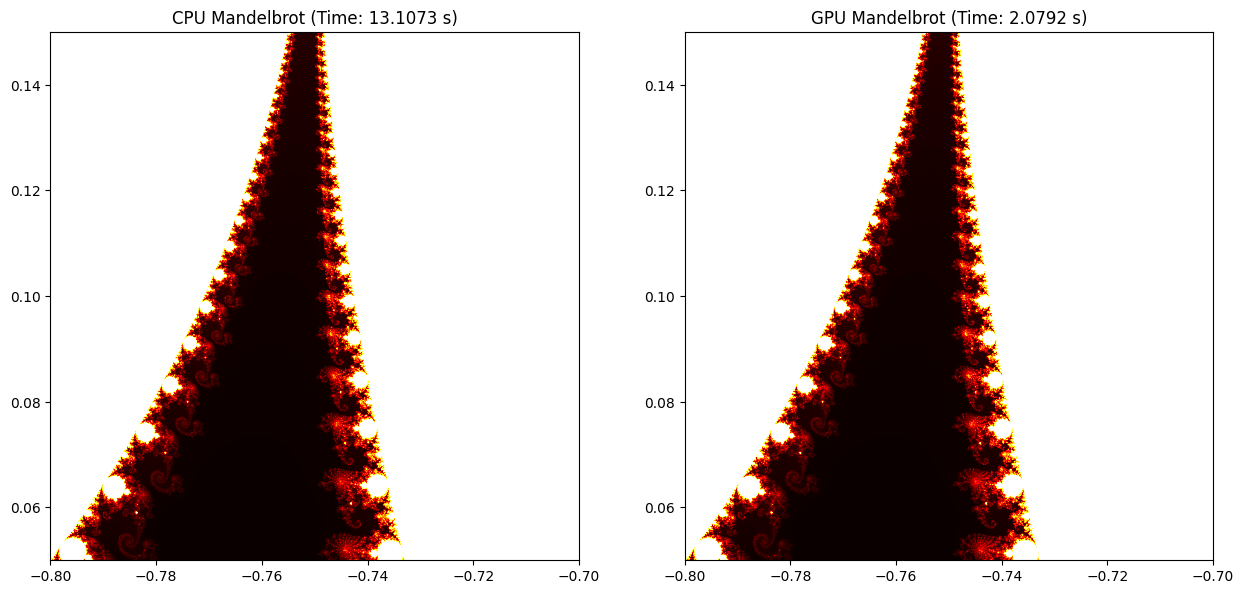

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to compute the Mandelbrot set with iteration counts
def mandelbrot(c, max_iter):
    z = c
    counts = tf.zeros_like(c, dtype=tf.int32)
    for n in range(max_iter):
        not_diverged = tf.abs(z) < 4
        counts += tf.cast(not_diverged, tf.int32)
        z = tf.where(not_diverged, z*z + c, z)
    return counts

# Function to generate the Mandelbrot set
def generate_mandelbrot(device, width, height, x_min, x_max, y_min, y_max, max_iter):
    with tf.device(device):
        x = tf.linspace(x_min, x_max, width)
        y = tf.linspace(y_min, y_max, height)
        X, Y = tf.meshgrid(x, y)
        C = tf.complex(X, Y)
        Z = mandelbrot(C, max_iter)
    return Z.numpy()

# Parameters for the zoomed-in Mandelbrot set
width, height = 1000, 1000
x_min, x_max = -0.8, -0.7
y_min, y_max = 0.05, 0.15
max_iter = 1000

# Generate and measure time on CPU
start_time = time.time()
cpu_mandelbrot = generate_mandelbrot('/CPU:0', width, height, x_min, x_max, y_min, y_max, max_iter)
cpu_time = time.time() - start_time
print(f"Time taken on CPU: {cpu_time:.4f} seconds")

# Generate and measure time on GPU
if gpu_available:
    start_time = time.time()
    gpu_mandelbrot = generate_mandelbrot('/GPU:0', width, height, x_min, x_max, y_min, y_max, max_iter)
    gpu_time = time.time() - start_time
    print(f"Time taken on GPU: {gpu_time:.4f} seconds")
else:
    gpu_mandelbrot = None
    print("No GPU available")

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cpu_mandelbrot, extent=[x_min, x_max, y_min, y_max], cmap='hot')
axes[0].set_title(f'CPU Mandelbrot (Time: {cpu_time:.4f} s)')

if gpu_available:
    axes[1].imshow(gpu_mandelbrot, extent=[x_min, x_max, y_min, y_max], cmap='hot')
    axes[1].set_title(f'GPU Mandelbrot (Time: {gpu_time:.4f} s)')
else:
    axes[1].set_visible(False)

plt.show()


In [67]:
import numpy as np
import pandas as pd

# Parameters
num_samples = 10000  # Total number of samples
sequence_length = 100  # Length of each input sequence
frequency_range = (5, 75)  # Frequency range for sine wave
amplitude_range = (0.1, 5.0)  # Amplitude range for sine wave
phase_shift_range = (0, 2 * np.pi)  # Phase shift range for sine wave
noise_level = 1.2  # Standard deviation of added Gaussian noise

# Dataset split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Calculate dataset sizes
num_train = int(num_samples * train_ratio)
num_validation = int(num_samples * validation_ratio)
num_test = num_samples - num_train - num_validation

def generate_data(num_samples):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        frequency = np.random.uniform(*frequency_range)
        amplitude = np.random.uniform(*amplitude_range)
        phase_shift = np.random.uniform(*phase_shift_range)

        # Generate sine wave
        x = np.linspace(0, 2 * np.pi, sequence_length)
        sine_wave = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

        # Add noise
        sine_wave_noisy = sine_wave + np.random.normal(0, noise_level, size=sequence_length)

        # Append data
        inputs.append(sine_wave_noisy.tolist())  # Convert to list for proper CSV serialization
        outputs.append([frequency, amplitude, phase_shift])

    return inputs, np.array(outputs)

# Generate datasets
train_inputs, train_outputs = generate_data(num_train)
validation_inputs, validation_outputs = generate_data(num_validation)
test_inputs, test_outputs = generate_data(num_test)

# Save to CSV files
def save_to_csv(inputs, outputs, file_name):
    data = pd.DataFrame({
        'inputs': [','.join(map(str, input_row)) for input_row in inputs],  # Properly format inputs with commas
        'frequency': outputs[:, 0],
        'amplitude': outputs[:, 1],
        'phase_shift': outputs[:, 2],
    })
    data.to_csv(file_name, index=False)

save_to_csv(train_inputs, train_outputs, "train_data.csv")
save_to_csv(validation_inputs, validation_outputs, "validation_data.csv")
save_to_csv(test_inputs, test_outputs, "test_data.csv")

print("Data files created: train_data.csv, validation_data.csv, test_data.csv")


Data files created: train_data.csv, validation_data.csv, test_data.csv


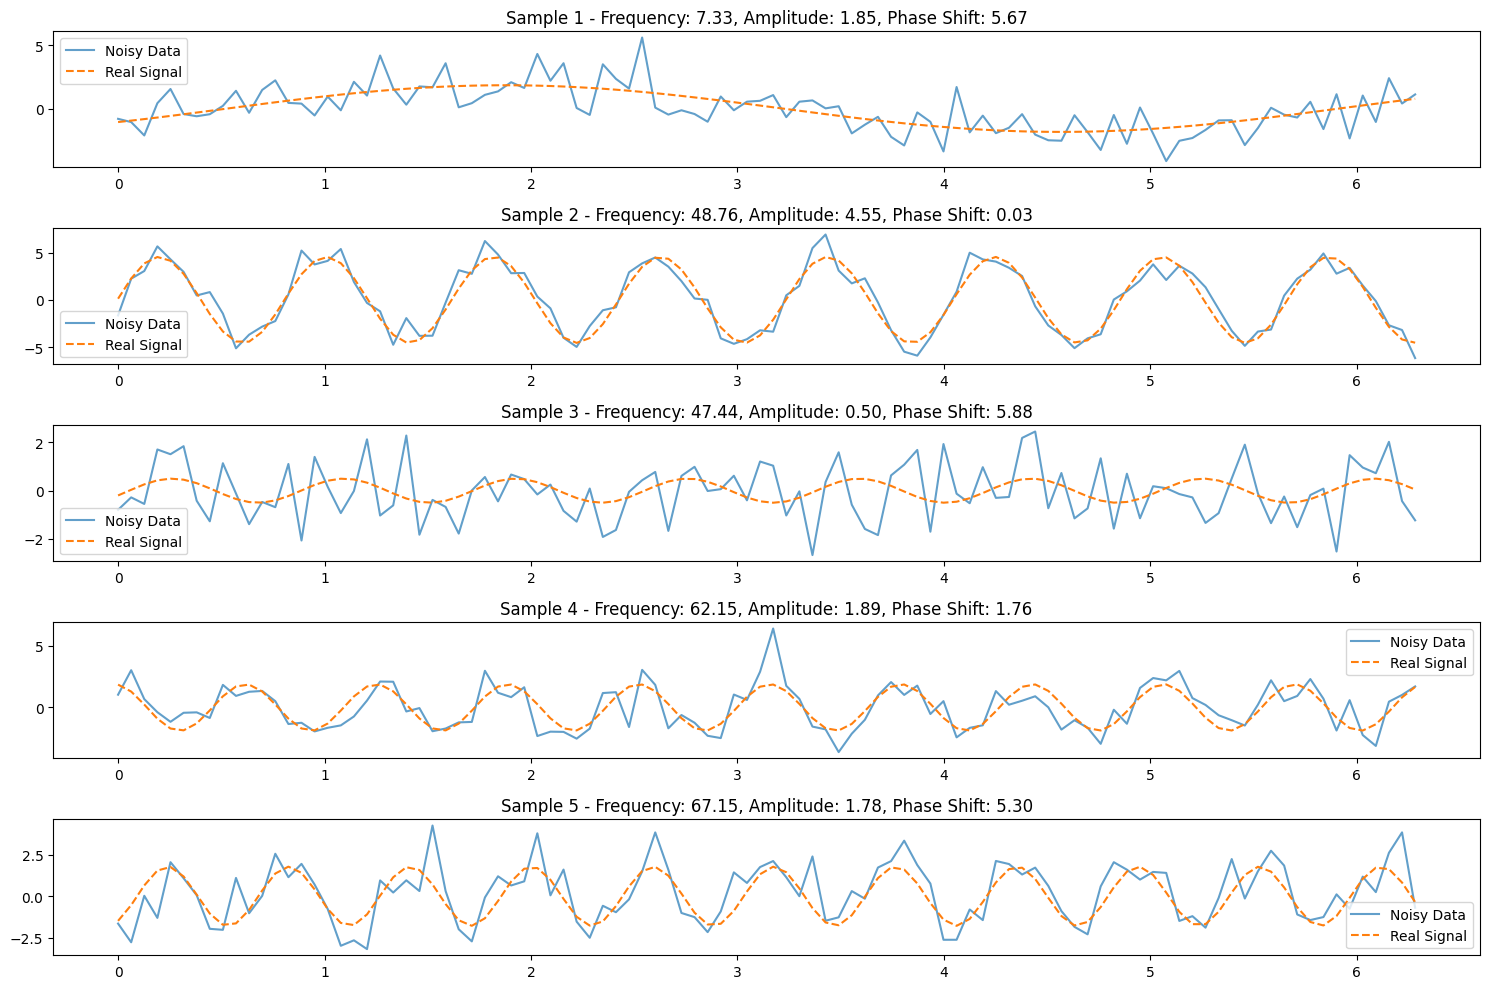

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reusing the load_data function
def load_data(file_name):
    data = pd.read_csv(file_name)

    # Parse inputs into a 2D NumPy array
    inputs = np.array(
        [np.array(eval(row)) if isinstance(row, str) else row for row in data["inputs"]]
    )

    # Extract outputs as a NumPy array
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs


# Load the training data
train_file = "train_data.csv"
inputs, outputs = load_data(train_file)
#print(inputs[3])

# Plot a few samples
num_samples_to_plot = 5
plt.figure(figsize=(15, 10))
x = np.linspace(0, 2 * np.pi, 100)  # X-axis for the sine wave

for i in range(num_samples_to_plot):
    noisy_data = inputs[i]
    frequency, amplitude, phase_shift = outputs[i]
    real_signal = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

    plt.subplot(num_samples_to_plot, 1, i + 1)
    plt.plot(x, noisy_data, label="Noisy Data", alpha=0.7)
    plt.plot(x, real_signal, label="Real Signal", linestyle="--")
    plt.title(f"Sample {i + 1} - Frequency: {frequency:.2f}, Amplitude: {amplitude:.2f}, Phase Shift: {phase_shift:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 100, 200)            │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │           1,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834,903 (3.18 MB)

 Trainable params: 834,903 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

None


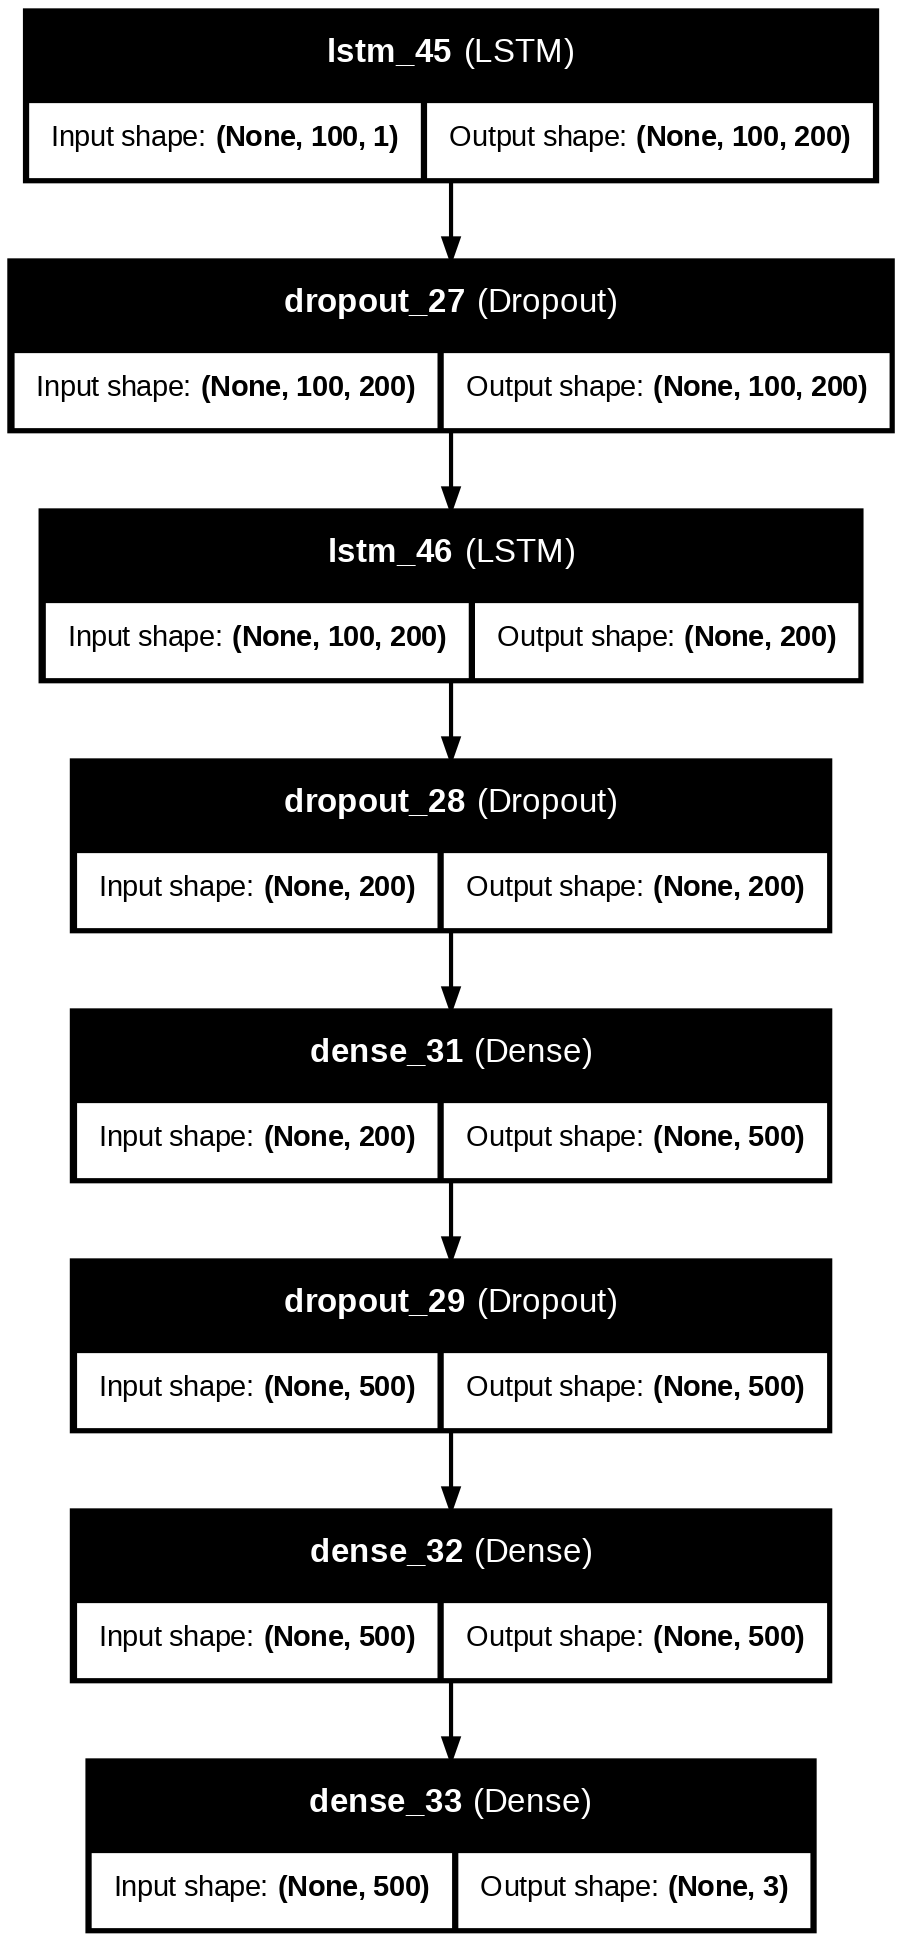

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 511.9011 - mae: 12.6811 - val_loss: 58.9258 - val_mae: 4.4442
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 57.4439 - mae: 4.3800 - val_loss: 35.2285 - val_mae: 3.3891
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 42.3094 - mae: 3.7459 - val_loss: 31.3817 - val_mae: 3.1789
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 39.6888 - mae: 3.6044 - val_loss: 30.8224 - val_mae: 3.0804
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 37.7972 - mae: 3.5356 - val_loss: 31.5278 - val_mae: 3.1295
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 39.3317 - mae: 3.5646 - val_loss: 30.0582 - val_mae: 3.0498
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 36.4349 - mae: 3.4274 - val_loss: 28.4598 - val_mae: 2.9132
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 36.1176 - mae: 3.3994 - val_loss: 28.9140 - val_mae: 2.9396
Epoch 9/50
219/219 ━━━━━━━━━━━

In [69]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adagrad
from IPython.display import Image, display

# Helper function to load data from CSV
def load_data(file_name):
    data = pd.read_csv(file_name)
    inputs = np.array([np.fromstring(row.strip("[]"), sep=",") for row in data["inputs"]])
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs

# Load datasets
train_inputs, train_outputs = load_data("train_data.csv")
validation_inputs, validation_outputs = load_data("validation_data.csv")
test_inputs, test_outputs = load_data("test_data.csv")

# Reshape inputs for LSTM: (samples, time_steps, features)
train_inputs = train_inputs.reshape(train_inputs.shape[0], train_inputs.shape[1], 1)
validation_inputs = validation_inputs.reshape(validation_inputs.shape[0], validation_inputs.shape[1], 1)
test_inputs = test_inputs.reshape(test_inputs.shape[0], test_inputs.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(200, activation='tanh', input_shape=(train_inputs.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(200, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dense(3))  # 3 outputs: frequency, amplitude, phase_shift

# Create a custom optimizer
#optimizer = Adam(learning_rate=0.0005)
optimizer = Adagrad(learning_rate=0.0005)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print the model summary
print(model.summary())

# Generate a diagram of the model and display it inline
plot_file = "model_diagram.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True, dpi=150)

# Display the diagram in Colab
display(Image(plot_file))

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_inputs, train_outputs,
    validation_data=(validation_inputs, validation_outputs),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on the test set
test_loss, test_mae = model.evaluate(test_inputs, test_outputs)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions on the test set
predictions = model.predict(test_inputs)

# Save predictions and test outputs for comparison
predictions_df = pd.DataFrame(predictions, columns=["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"])
actuals_df = pd.DataFrame(test_outputs, columns=["actual_frequency", "actual_amplitude", "actual_phase_shift"])
comparison_df = pd.concat([predictions_df, actuals_df], axis=1)
comparison_df.to_csv("predictions_vs_actuals.csv", index=False)

print("Predictions vs Actuals saved to predictions_vs_actuals.csv")


   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0            42.291904             0.890853               2.363288   
1            12.421121             0.926302               2.423659   
2            10.874534             0.956580               2.396162   
3            15.429111             0.946622               2.450801   
4            25.008514             1.010628               2.654972   

   actual_frequency  actual_amplitude  actual_phase_shift  
0         43.806064          1.708348            5.635941  
1         13.893072          0.855445            1.729373  
2         12.303747          1.165239            0.017833  
3         15.991635          1.804898            6.252954  
4         27.192435          1.013362            0.595883  


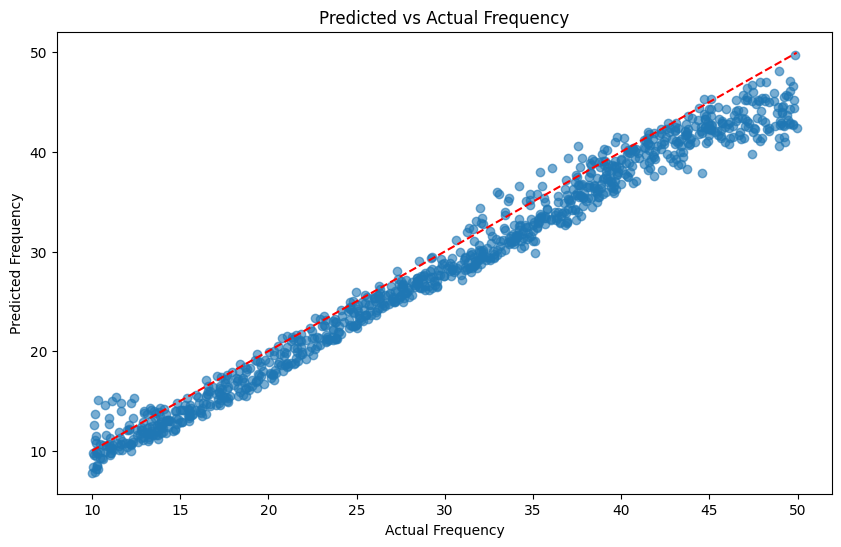

In [61]:
import pandas as pd

# Load the predictions vs actuals file
file_name = "predictions_vs_actuals.csv"
comparison_df = pd.read_csv(file_name)

# Display the predictions vs actuals data
print(comparison_df.head())  # Show the first few rows of the dataset

# Optionally, visualize the data
import matplotlib.pyplot as plt

# Plot predicted vs actual frequencies
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df["actual_frequency"], comparison_df["predicted_frequency"], alpha=0.6)
plt.plot([comparison_df["actual_frequency"].min(), comparison_df["actual_frequency"].max()],
         [comparison_df["actual_frequency"].min(), comparison_df["actual_frequency"].max()],
         color='red', linestyle='--')
plt.title("Predicted vs Actual Frequency")
plt.xlabel("Actual Frequency")
plt.ylabel("Predicted Frequency")
plt.show()

# Similarly, you can create plots for amplitude and phase shift:
# Uncomment and repeat for amplitude and phase shift if desired
# Replace "frequency" with "amplitude" or "phase_shift" in column names


   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0            42.291904             0.890853               2.363288   
1            12.421121             0.926302               2.423659   
2            10.874534             0.956580               2.396162   
3            15.429111             0.946622               2.450801   
4            25.008514             1.010628               2.654972   

   actual_frequency  actual_amplitude  actual_phase_shift  
0         43.806064          1.708348            5.635941  
1         13.893072          0.855445            1.729373  
2         12.303747          1.165239            0.017833  
3         15.991635          1.804898            6.252954  
4         27.192435          1.013362            0.595883  


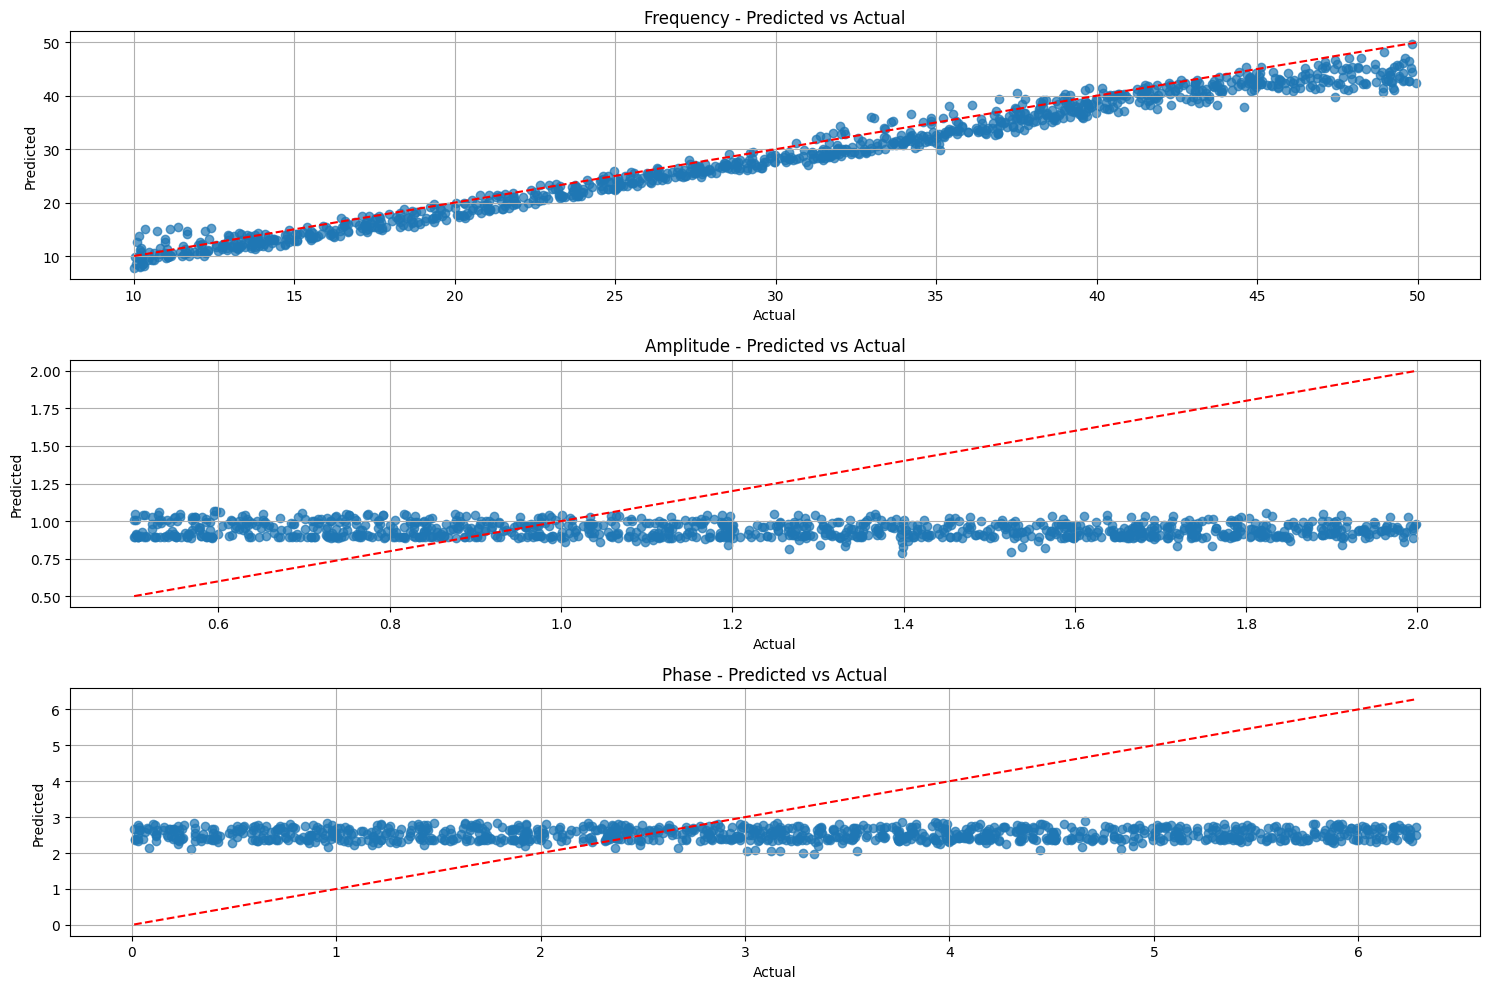

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions vs actuals data
predictions_file = "predictions_vs_actuals.csv"
data = pd.read_csv(predictions_file)

# Display the predictions vs actuals data
print(data.head())  # Show the first few rows of the dataset

# Extract columns for plotting
predicted_columns = ["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"]
actual_columns = ["actual_frequency", "actual_amplitude", "actual_phase_shift"]

# Plot each correlation
plt.figure(figsize=(15, 10))

for i, (predicted, actual) in enumerate(zip(predicted_columns, actual_columns)):
    plt.subplot(3, 1, i + 1)
    plt.scatter(data[actual], data[predicted], alpha=0.7)
    plt.plot(
        [data[actual].min(), data[actual].max()],
        [data[actual].min(), data[actual].max()],
        color='red', linestyle='--'
    )
    plt.title(f"{actual.split('_')[1].capitalize()} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()

